**<font size= "6"> Courwork 4**  
   <font size= "4"> Part 2: Additional Analysis of the Storks Data

## 0.0 Aims and Outline

The purpose of the note book is use linear regression and bootstraps to calculate different model and compare each other, then to find out which models and the predictor variables can more powerful explain the target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.utils import resample
%matplotlib inline

## 0.1 Introduce original dataset

Here is the Table of Geographic, human and stork data for 17 European countries

In [2]:
origin = pd.read_csv('storks.csv')
origin

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


The variables in the data set are shown below.
| Variable | Description and Values | Type |
|:---------:|:-----------|:-------|
| Country |different countries in Europe | Categorical|
| Area |The number of areas in this country| Continuous|
| Storks | The number of Storks in this country | Continuous |
| Humans |  The population size in this country | Continuous |
| BirthRate   |The rate of birth in this country | Continuous |
| SuitableAreaPercent |The percent of suitable areas in whole areas | Continuous|

## 1. Analysis 1A

### 1.1 Implement two regression models for the number of births 

**Model 1:** predictor: the number of storks   
**Model 2:** predictor is the population size

In [3]:
y = origin.BirthRate # this is the target variable; we assue just one though more are possible
x1 = origin.Storks.values.reshape(-1, 1)
x2 = origin.Humans.values.reshape(-1, 1)

In [4]:
reg1 = LinearRegression().fit(x1, y)
reg2 = LinearRegression().fit(x2, y)
y_pred1 = reg1.predict(x1)
y_pred2 = reg2.predict(x2)

Explain:  
**R2:** The coefficient of determination is a number between 0 and 1 that measures how well a statistical model predicts an outcome.  

|  Coefficient of determination (R2)     |      Interpretation             |
|:--------------|:-----------------------------|
|0  | The model does not predict the outcome.                  | 
|Between 0 and 1       | The model partially predicts the outcome. |
|1      | The model perfectly predicts the outcome.                | 

In [5]:
print('The R2 coefficient of determination of Model 1 is %4.3f' % reg1.score(x1, y))
print('The R2 coefficient of determination of Model 2 is %4.3f' % reg2.score(x2, y))

The R2 coefficient of determination of Model 1 is 0.385
The R2 coefficient of determination of Model 2 is 0.725


### 1.2 Plots of models

Use linear regression to fit both models and show the result with plots

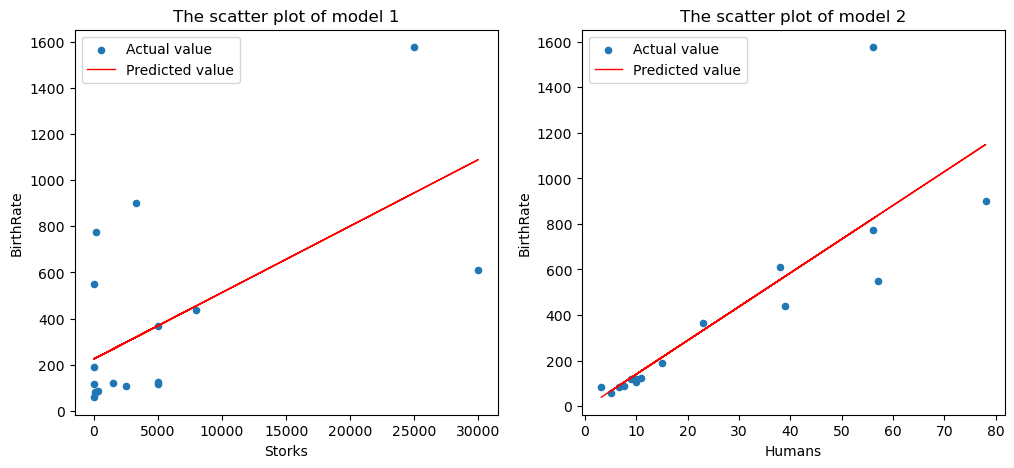

In [6]:
fig, (a1,a2) = plt.subplots(1, 2, figsize=(12,5))
origin.plot(kind='scatter',  x='Storks', y='BirthRate', ax=a1, label = 'Actual value')
origin.plot(kind='scatter',  x='Humans', y='BirthRate', ax=a2, label= 'Actual value')
a1.plot(x1, y_pred1, color='red', linewidth=1,label='Predicted value')
a1.set_title("The scatter plot of model 1")
a1.legend()
a2.plot(x2, y_pred2, color='red', linewidth=1,label = 'Predicted value')
a2.set_title("The scatter plot of model 2")
a2.legend()

### 1.3 Simple Explanatory

From the plots we can see more dots are closer to the predict line in model 2 and model 2 also shows a bigger value of R2,  which shows Model 2 fit better than Model 1.

### 1.4 Further analysis with bootstrap

We use a statistical way(called bootstrap which means each value will have equal chance to be pick up each time) to resample both data in two models and calculate the difference of R2( Model 1 minus Model 2)

In [7]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

And in this analysis we resample 10000 times to compare the R2 value in both models.

Text(0, 0.5, 'Count')

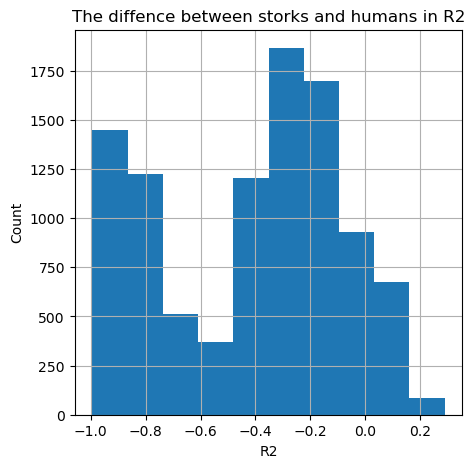

In [8]:
def doRegression1(origin) :
    y = origin.BirthRate # this is the target variable; we assue just one though more are possible
    X1 = origin.Storks.values.reshape(-1,1)
    X2 = origin.Humans.values.reshape(-1,1)
    reg1 = LinearRegression().fit(X1, y)
    reg2 = LinearRegression().fit(X2, y)
    return [reg1.score(X1, y)-reg2.score(X2, y)] 

bstrap1 = bootstrapC(origin, ['R2'], 10000, doRegression1) 
_ = bstrap1.hist(figsize=(5,5))
plt.title('The diffence between storks and humans in R2')
plt.xlabel("R2")
plt.ylabel('Count')

As we can see from the above the bin diagram, most value of difference are negative, and we can calculate and conclude that:

In [9]:
print("The difference in R2(Model 1 minus Model 2) with 90%% confidence interval from %3.2f to %3.2f" % 
      (bstrap1.R2.quantile(0.05), bstrap1.R2.quantile(0.95)))

The difference in R2(Model 1 minus Model 2) with 90% confidence interval from -0.94 to 0.07


**Explain:** Since we have 90% confidence the difference in R2(Model 1 minus Model 2) mostly are negative that shows Model 2 has a bigger value of R2 in most samples, **We can be confident that model 2 explains more of the variability in the number of births than model 1.**

## 2. Analysis 2A:

### 2.1 Implement two regression models for the number of storks

**Model 3:** predictor is the land area(The number of areas).

In [10]:
y2 = origin.Storks # this is the target variable; we assue just one though more are possible
x3 = origin.Area.values.reshape(-1, 1)
reg3 = LinearRegression().fit(x3, y2)
y_pred3 = reg3.predict(x3)

Explain:   
**Root mean squared error:** Root mean squared error (RMSE) measures the amount of error in statistical models. It assesses the average root squared difference between the actual and predicted values. When a model has no error, the RMSE equals zero. As model error increases, its value increases. 

In [11]:
print('Root of the mean squared error of Model 3: %.2f'% mean_squared_error(y2, y_pred3, squared=False))

Root of the mean squared error of Model 3: 6984.77


**Model 4**: predictors are:   
i) the population density( Density = Humans / Areas)  
ii) the area of suitable(Suitable Area = Area * SuitableAreaPercent / 100)

In [12]:
origin1 = origin.assign(density = origin.Humans/origin.Area)
origin1 = origin1.assign(sland = origin.Area*origin.SuitableAreaPercent/100)

In [13]:
X = np.column_stack((origin1.density,origin1.sland))
reg4 = LinearRegression().fit(X, y2)
y_hat = reg4.predict(X)

In [14]:
print('Root of the mean squared error of Model 4: %.2f'% mean_squared_error(y2, y_hat, squared=False))

Root of the mean squared error of Model 4: 6677.03


### 2.2 Plots of models

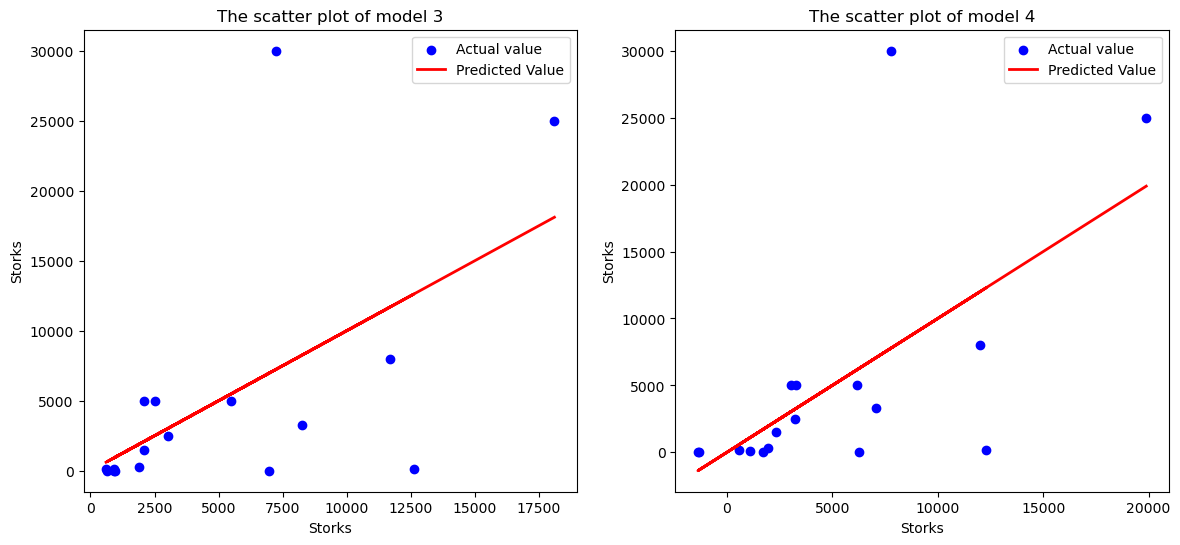

In [15]:
fig,(a1,a2) = plt.subplots(1,2,figsize=(14,6))
a1.scatter(y_pred3, y2,  color='blue',label = 'Actual value')
a1.plot(y_pred3, y_pred3, color='red', linewidth=2, label = 'Predicted Value')
a1.set_xlabel('Storks')
a1.set_ylabel('Storks')
a1.legend()
a1.set_title("The scatter plot of model 3")
a2.scatter(y_hat, y2,  color='blue',label = 'Actual value')
a2.plot(y_hat, y_hat, color='red', linewidth=2, label = 'Predicted Value')
a2.set_title("The scatter plot of model 4")
a2.set_xlabel('Storks')
a2.set_ylabel('Storks')
a2.legend()

### 2.3 Simple explanatory

From the plots we can see more dots are closer to the predict line in model 4 and model 4 also shows a smaller value of RMSE,  which shows Model 4 fit better than Model 3.

### 2.4 Further analysis with bootstrap

We use resample both data in two models and calculate the difference of R2( Model 3 minus Model 4); And in this analysis we resample 10000 times to compare the RMSE value in both models.

Text(0, 0.5, 'Count')

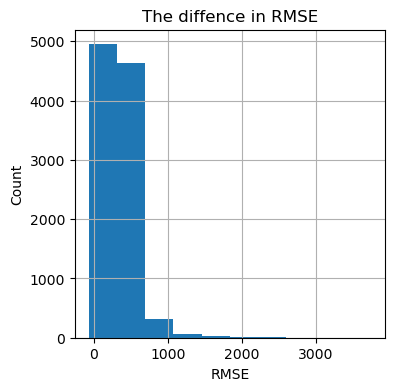

In [16]:
def doRegression2(origin1) :
    y = origin1.Storks
    X1 = np.column_stack(origin1.Area).reshape(-1,1)
    X2 = np.column_stack((origin1.density,origin1.sland))
    reg1 = LinearRegression().fit(X1, y)
    reg2 = LinearRegression().fit(X2, y)
    y_hat1 = reg1.predict(X1)
    y_hat2 = reg2.predict(X2)
    rmse1 = mean_squared_error(y, y_hat1, squared=False)
    rmse2 = mean_squared_error(y, y_hat2, squared=False)
    return [rmse1-rmse2] 

bstrap3 = bootstrapC(origin1, ['RMSE'], 10000, doRegression2) 
_ = bstrap3.hist(figsize=(4,4))
plt.title('The diffence in RMSE')
plt.xlabel("RMSE")
plt.ylabel('Count')

As we can see from the above the bin diagram, most value of difference are positive, and we can calculate and conclude that:

In [17]:
print("The difference in RMSE with 90%% CI from %3.2f to %3.2f" % 
      (bstrap3.RMSE.quantile(0.05), bstrap3.RMSE.quantile(0.95)))

The difference in RMSE with 90% CI from 111.40 to 660.65


**Explain:** Since we have 90% confidence the differences in RMSE (Model 3 minus Model 4) are positive that shows Model 4 has a smaller value of RMSE in most samples which means has less errors, **We can be confident that model 4 explains more of the variability in the number of storks than model 3.**